# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which we will be able to build our own classification models for a variety of business settings. 

Also we will learn what is Employee Churn, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

We will be able to implement classification techniques in Python. Using Scikit-Learn allowing us to successfully make predictions with the Random Forest, Gradient Boosting Descent, KNN algorithms.

At the end of the project, we will have the opportunity to deploy our model using *Streamlit*.

Before diving into the project, let's take a look at the determines and project structure.

- NOTE: This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployment as well as the theory behind K-Means, Gradient Boosting Descent, KNN, Random Forest, and Confusion Matrices.



# #Determines
In this project we have HR data of a company. A study is requested from us to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, we have two types of employee one who stayed and another who left the company.

We can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in average an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, we will use exploratory data analysis and data visualization techniques. 

Then, we will perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. We are asked to perform ***Cluster Analysis*** based on the information we obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. We are asked to use the ***K-means*** algorithm to make cluster analysis. However, we must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data we apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, we are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, we must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Also will train your models with our train set, test the success of our model with our test set. 

Try to make our predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, we will deploy our model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [131]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df = pd.read_csv('HR_Dataset.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [6]:
df.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 64)
df.groupby(['left', 'Departments ', 'salary'], as_index=True).describe()

satisfaction_level                                    \
                                      count      mean       std   min     25%   
left Departments  salary                                                        
0    IT           high                 79.0  0.641013  0.226368  0.15  0.5300   
                  low                 437.0  0.681648  0.215043  0.12  0.5600   
                  medium              438.0  0.679224  0.199374  0.14  0.5600   
     RandD        high                 47.0  0.607021  0.222983  0.12  0.4850   
                  low                 309.0  0.651294  0.228441  0.12  0.5200   
                  medium              310.0  0.663387  0.214601  0.13  0.5300   
     accounting   high                 69.0  0.635217  0.229934  0.16  0.5100   
                  low                 259.0  0.643282  0.217160  0.13  0.5000   
                  medium              235.0  0.655064  0.224039  0.12  0.5300   
     hr           high                 39.0  0.735897  0.193727  0.18  0.6050   
                  low                 243.0  0.658560  0.214272  0.13  0.5300   
                  medium              242.0  0.663678  0.220144  0.13  0.5300   
     management   high                224.0  0.654375  0.194241  0.14  0.5300   
                  low                 121.0  0.680496  0.219704  0.13  0.5600   
                  medium              194.0  0.639433  0.197521  0.12  0.5100   
     marketing    high                 71.0  0.628310  0.262412  0.14  0.4700   
                  low                 276.0  0.675833  0.220900  0.13  0.5400   
                  medium              308.0  0.674123  0.205298  0.12  0.5400   
     product_mng  high                 62.0  0.641935  0.236663  0.16  0.4925   
                  low                 346.0  0.661908  0.224352  0.13  0.5300   
                  medium              296.0  0.657905  0.214042  0.13  0.5200   
     sales        high                255.0  0.660039  0.225262  0.13  0.5400   
                  low                1402.0  0.669365  0.217873  0.12  0.5400   
                  medium             1469.0  0.669244  0.225686  0.12  0.5400   
     support      high                133.0  0.662406  0.223329  0.15  0.5200   
                  low                 757.0  0.673435  0.214039  0.12  0.5400   
                  medium              784.0  0.676084  0.210833  0.12  0.5500   
     technical    high                176.0  0.646705  0.213042  0.13  0.5275   
                  low                 994.0  0.668833  0.219980  0.12  0.5400   
                  medium              853.0  0.672181  0.210638  0.12  0.5500   
1    IT           high                  4.0  0.582500  0.178209  0.40  0.4450   
                  low                 172.0  0.428314  0.272259  0.09  0.1100   
                  medium               97.0  0.375670  0.268506  0.09  0.1000   
     RandD        high                  4.0  0.347500  0.165000  0.10  0.3475   
                  low                  55.0  0.470182  0.263779  0.09  0.3200   
                  medium               62.0  0.405161  0.302073  0.09  0.1025   
     accounting   high                  5.0  0.322000  0.121326  0.11  0.3600   
                  low                  99.0  0.393333  0.248965  0.09  0.1100   
                  medium              100.0  0.415800  0.269939  0.09  0.1100   
     hr           high                  6.0  0.265000  0.192016  0.09  0.0900   
                  low                  92.0  0.476848  0.254808  0.09  0.3700   
                  medium              117.0  0.407863  0.229936  0.09  0.3600   
     management   high                  1.0  0.420000       NaN  0.42  0.4200   
                  low                  59.0  0.467627  0.263114  0.09  0.3650   
                  medium               31.0  0.337742  0.271719  0.09  0.1000   
     marketing    high                  9.0  0.423333  0.040000  0.37  0.3700   
                  low                 126.0  0.443175  0

In [8]:
df_left = df[df['left']==1]
df_stay = df[df['left']==0]
df_left.drop('left', axis=1, inplace=True)
df_stay.drop('left', axis=1, inplace=True)

In [9]:
df_left.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
salary,,,,,,,
high,0.434512,0.644024,3.451220,193.097561,3.682927,0.000000,0.000000
low,0.441248,0.716994,3.836096,206.631215,3.874770,0.043738,0.006446
medium,0.438550,0.724571,3.912680,209.610478,3.891420,0.056188,0.003797


In [10]:
df_left.groupby('Departments ').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Departments,,,,,,,
IT,0.411868,0.730037,4.025641,213.849817,3.860806,0.032967,0.010989
RandD,0.432810,0.745372,4.024793,210.975207,4.000000,0.082645,0.000000
accounting,0.402598,0.694510,3.872549,207.029412,3.794118,0.044118,0.000000
hr,0.433395,0.679721,3.539535,197.306977,3.753488,0.032558,0.000000
management,0.422857,0.727253,4.142857,207.263736,3.758242,0.054945,0.032967
marketing,0.453153,0.692020,3.581281,200.990148,3.857143,0.049261,0.000000
product_mng,0.481566,0.726566,3.848485,207.787879,3.989899,0.045455,0.000000
sales,0.447663,0.711243,3.736686,205.041420,3.812623,0.045365,0.006903
support,0.450901,0.727315,3.864865,205.636036,3.933333,0.055856,0.005405


In [11]:
df_left.groupby(['Departments ', 'salary']).mean()

satisfaction_level  last_evaluation  number_project  \
Departments  salary                                                        
IT           high              0.582500         0.715000        3.500000   
             low               0.428314         0.725407        3.924419   
             medium            0.375670         0.738866        4.226804   
RandD        high              0.347500         0.602500        2.750000   
             low               0.470182         0.728364        3.872727   
             medium            0.405161         0.769677        4.241935   
accounting   high              0.322000         0.582000        2.800000   
             low               0.393333         0.680303        3.818182   
             medium            0.415800         0.714200        3.980000   
hr           high              0.265000         0.658333        4.000000   
             low               0.476848         0.694348        3.565217   
             medium            0.407863         0.669316        3.495726   
management   high              0.420000         0.970000        6.000000   
             low               0.467627         0.688644        3.728814   
             medium            0.337742         0.792903        4.870968   
marketing    high              0.423333         0.523333        2.000000   
             low               0.443175         0.706984        3.698413   
             medium            0.475588         0.686618        3.573529   
product_mng  high              0.326667         0.631667        3.333333   
             low               0.485810         0.750000        4.085714   
             medium            0.487126         0.704828        3.597701   
sales        high              0.447143         0.772857        4.785714   
             low               0.462999         0.712123        3.711621   
             medium            0.412409         0.706370        3.745875   
support      high              0.532500         0.690000        3.625000   
             low               0.432674         0.717044        3.796915   
             medium            0.491646         0.754494        4.044304   
technical    high              0.480000         0.594800        3.200000   
             low               0.398386         0.734153        4.124339   
             medium            0.472381         0.745952        4.054422   

                     average_montly_hours  time_spend_company  Work_accident  \
Departments  salary                                                            
IT           high              206.750000            4.000000       0.000000   
             low               210.220930            3.906977       0.034884   
             medium            220.577320            3.773196       0.030928   
RandD        high              171.000000            3.250000       0.000000   
             low               205.909091            4.018182       0.090909   
             medium            218.048387            4.032258       0.080645   
accounting   high              170.000000            3.200000       0.000000   
             low               202.626263            3.747475       0.020202   
             medium            213.240000            3.870000       0.070000   
hr           high              221.833333            3.500000       0.000000   
             low               204.206522            3.782609       0.043478   
             medium            190.623932            3.743590       0.025641   
management   high              259.000000            4.000000       0.000000   
             low               197.779661            3.711864       0.050847   
             medium            223.645161            3.838710       0.064516   
marketing    high              142.000000            3.000000       0.000000   
             low               206.746032            3.912698       0.031746   
             medium            198.132353            3.867647       

In [12]:
df_stay.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
salary,,,,,,,
high,0.651879,0.708606,3.789610,200.348052,3.693506,0.166234,0.062338
low,0.668103,0.717028,3.784603,198.617418,3.253888,0.183709,0.010109
medium,0.668875,0.715461,3.788068,199.214272,3.435952,0.168259,0.034315


In [13]:
df_stay.groupby('Departments ').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Departments,,,,,,,
IT,0.677170,0.713050,3.756813,198.886792,3.356394,0.162474,0.000000
RandD,0.653799,0.706081,3.822823,198.951952,3.252252,0.186186,0.040541
accounting,0.647211,0.726128,3.808171,199.037300,3.424512,0.154529,0.024867
hr,0.666679,0.720802,3.702290,199.250000,3.192748,0.156489,0.028626
management,0.654861,0.723451,3.812616,200.233766,4.395176,0.181818,0.122449
marketing,0.669878,0.723282,3.720611,198.888550,3.480916,0.195420,0.065649
product_mng,0.658466,0.711435,3.795455,197.765625,3.330966,0.174716,0.000000
sales,0.668548,0.709223,3.789187,199.571657,3.443698,0.173065,0.029750
support,0.673799,0.721714,3.783751,199.140980,3.213859,0.187575,0.010155


In [14]:
df_stay.groupby(['Departments ', 'salary']).mean()

satisfaction_level  last_evaluation  number_project  \
Departments  salary                                                        
IT           high              0.641013         0.716709        3.886076   
             low               0.681648         0.711831        3.743707   
             medium            0.679224         0.713607        3.746575   
RandD        high              0.607021         0.708936        3.851064   
             low               0.651294         0.711650        3.792880   
             medium            0.663387         0.700097        3.848387   
accounting   high              0.635217         0.734928        3.985507   
             low               0.643282         0.726718        3.795367   
             medium            0.655064         0.722894        3.770213   
hr           high              0.735897         0.756923        3.871795   
             low               0.658560         0.726708        3.740741   
             medium            0.663678         0.709050        3.636364   
management   high              0.654375         0.714688        3.767857   
             low               0.680496         0.724628        3.801653   
             medium            0.639433         0.732835        3.871134   
marketing    high              0.628310         0.681408        3.605634   
             low               0.675833         0.736993        3.775362   
             medium            0.674123         0.720649        3.698052   
product_mng  high              0.641935         0.669032        3.741935   
             low               0.661908         0.718497        3.745665   
             medium            0.657905         0.712061        3.864865   
sales        high              0.660039         0.695804        3.807843   
             low               0.669365         0.707817        3.781027   
             medium            0.669244         0.712893        3.793737   
support      high              0.662406         0.715564        3.804511   
             low               0.673435         0.720753        3.782034   
             medium            0.676084         0.723686        3.781888   
technical    high              0.646705         0.714318        3.715909   
             low               0.668833         0.719266        3.828974   
             medium            0.672181         0.713986        3.818288   

                     average_montly_hours  time_spend_company  Work_accident  \
Departments  salary                                                            
IT           high              194.329114            3.025316       0.050633   
             low               197.903890            3.254005       0.189931   
             medium            200.689498            3.518265       0.155251   
RandD        high              202.191489            3.553191       0.191489   
             low               197.472492            3.268608       0.213592   
             medium            199.935484            3.190323       0.158065   
accounting   high              208.507246            3.217391       0.217391   
             low               198.857143            3.320463       0.146718   
             medium            196.455319            3.600000       0.144681   
hr           high              207.102564            2.820513       0.102564   
             low               201.794239            3.061728       0.172840   
             medium            195.429752            3.384298       0.148760   
management   high              199.986607            5.169643       0.160714   
             low               202.190083            3.264463       0.223140   
             medium            199.298969            4.206186       0.180412   
marketing    high              191.098592            3.577465       0.183099   
             low               203.456522            3.351449       0.210145   
             medium            196.590909            3.574675       

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

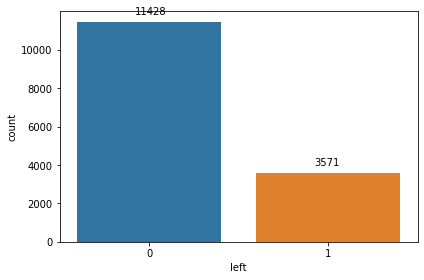

In [15]:
ax = sns.countplot(df.left)
# calculate the counts and annotate the sns barplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2.5, rect.get_height() + 400, rect.get_height())
plt.tight_layout()
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

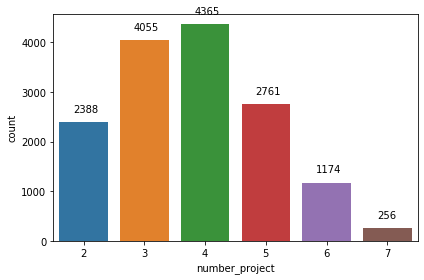

In [16]:
ax = sns.countplot(df.number_project)
# calculate the counts and annotate the sns barplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 3.5, rect.get_height() + 200, rect.get_height())
plt.tight_layout()
plt.show()

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


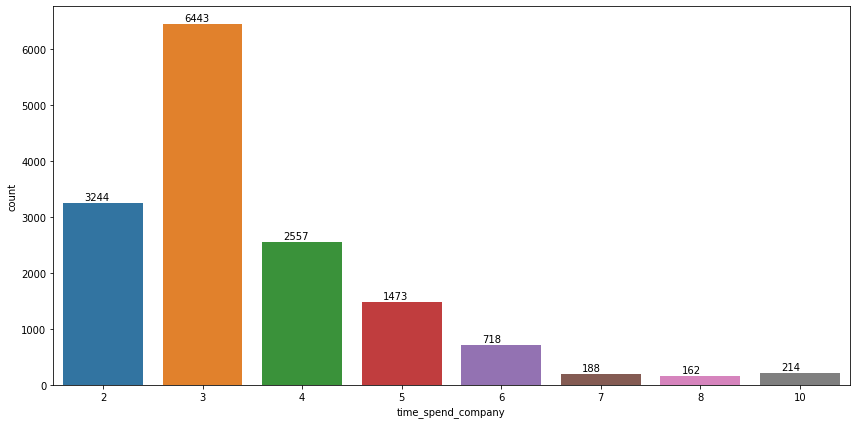

In [17]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df.time_spend_company)
# calculate the counts and annotate the sns barplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 3.8, rect.get_height() + 50, rect.get_height())
plt.tight_layout()
plt.show()

### Subplots of Features

You can use the methods of the matplotlib.

In [18]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

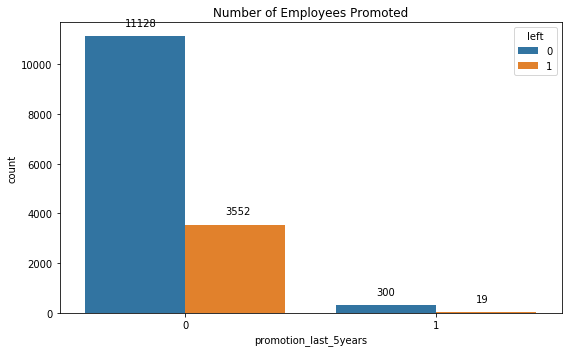

In [19]:
# Count of promoted last 5 years hued by 'left'
plt.figure(figsize=(8,5))
ax = sns.countplot(df.promotion_last_5years, hue=df.left)
plt.title('Number of Employees Promoted')
# calculate the counts and annotate the sns barplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2.5, rect.get_height() + 400, rect.get_height())
plt.tight_layout()
plt.show()

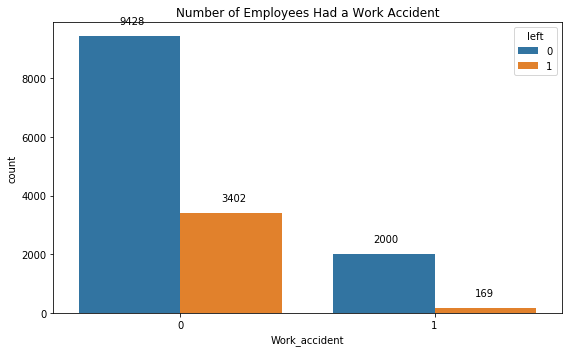

In [20]:
# Number of employees had a work accident
plt.figure(figsize=(8,5))
ax = sns.countplot(df.Work_accident, hue=df.left)
plt.title('Number of Employees Had a Work Accident')
# calculate the counts and annotate the sns countplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2.5, rect.get_height() + 400, rect.get_height())
plt.tight_layout()
plt.show()

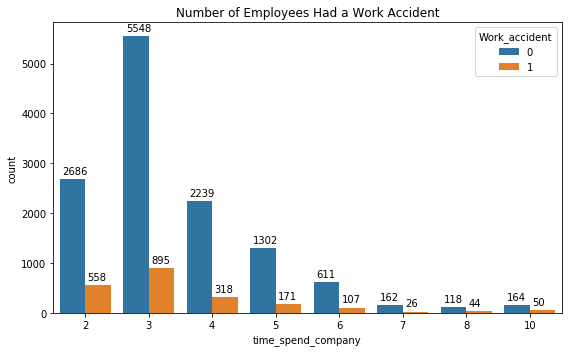

In [21]:
# Number of employees had a work accident
plt.figure(figsize=(8,5))
ax = sns.countplot(df.time_spend_company, hue=df.Work_accident)
plt.title('Number of Employees Had a Work Accident')
# calculate the counts and annotate the sns countplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 10, rect.get_height() + 100, rect.get_height())
plt.tight_layout()
plt.show()

In [22]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (14999, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################


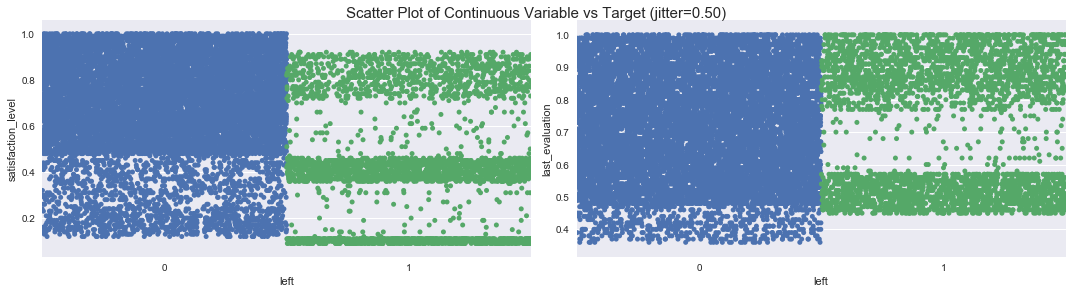

Total Number of Scatter Plots = 3


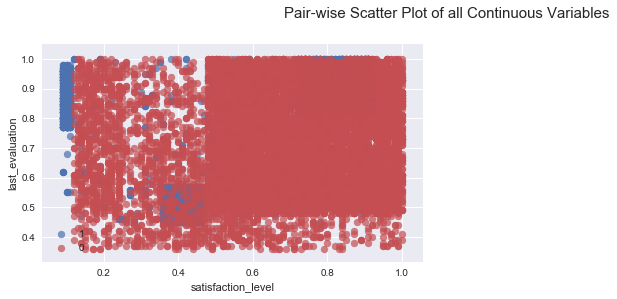

No handles with labels found to put in legend.
No handles with labels found to put in legend.


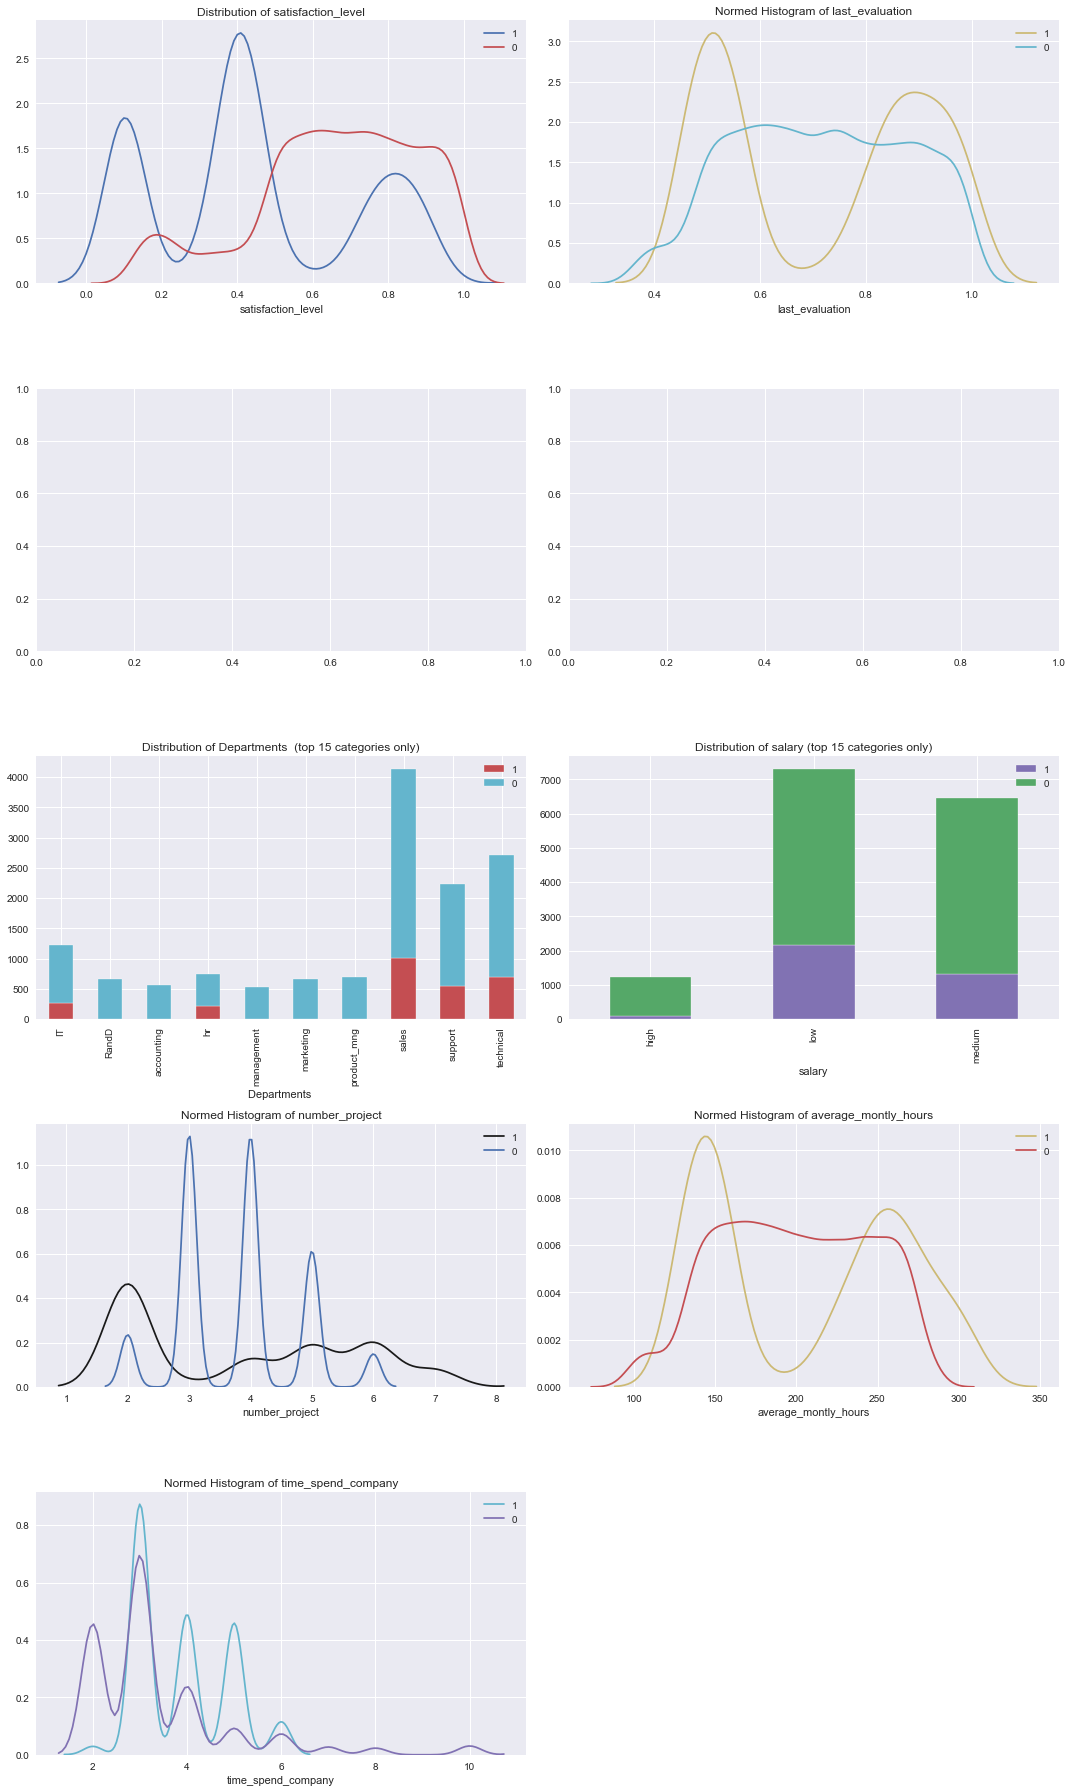

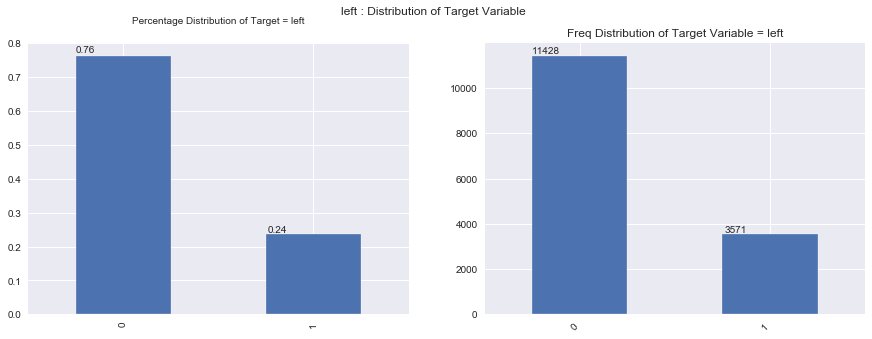

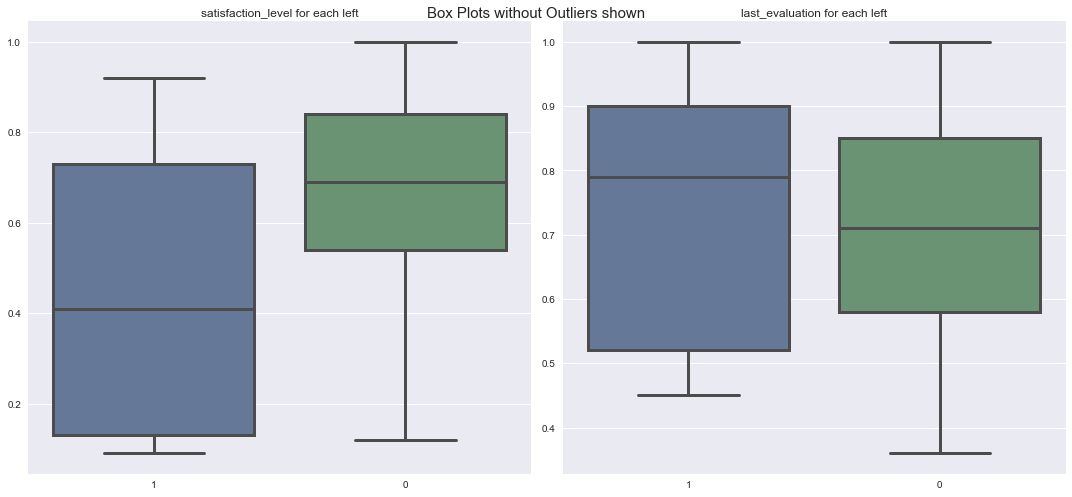

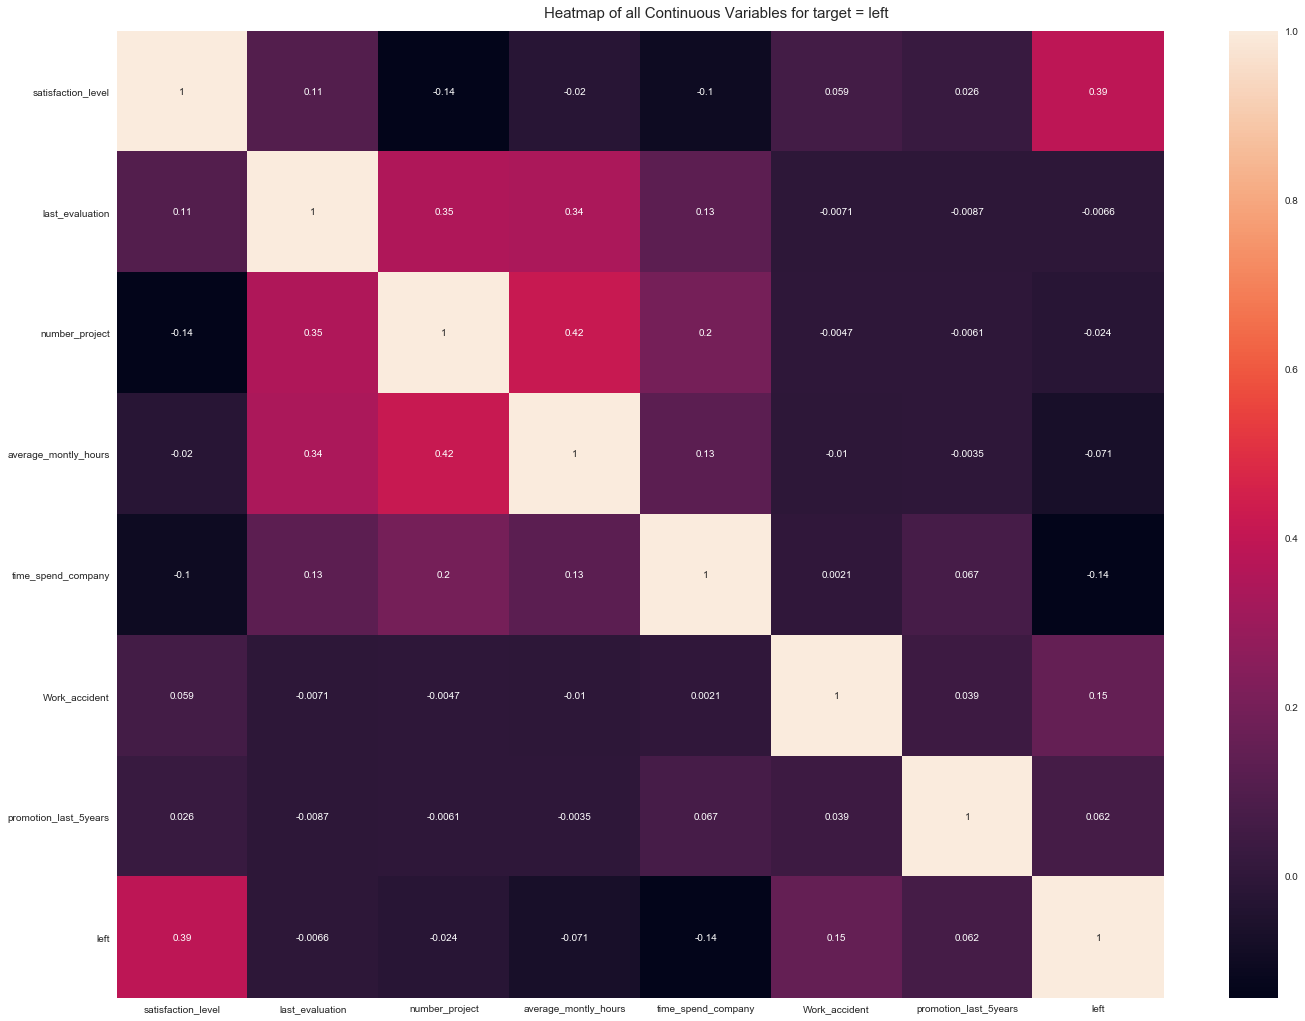

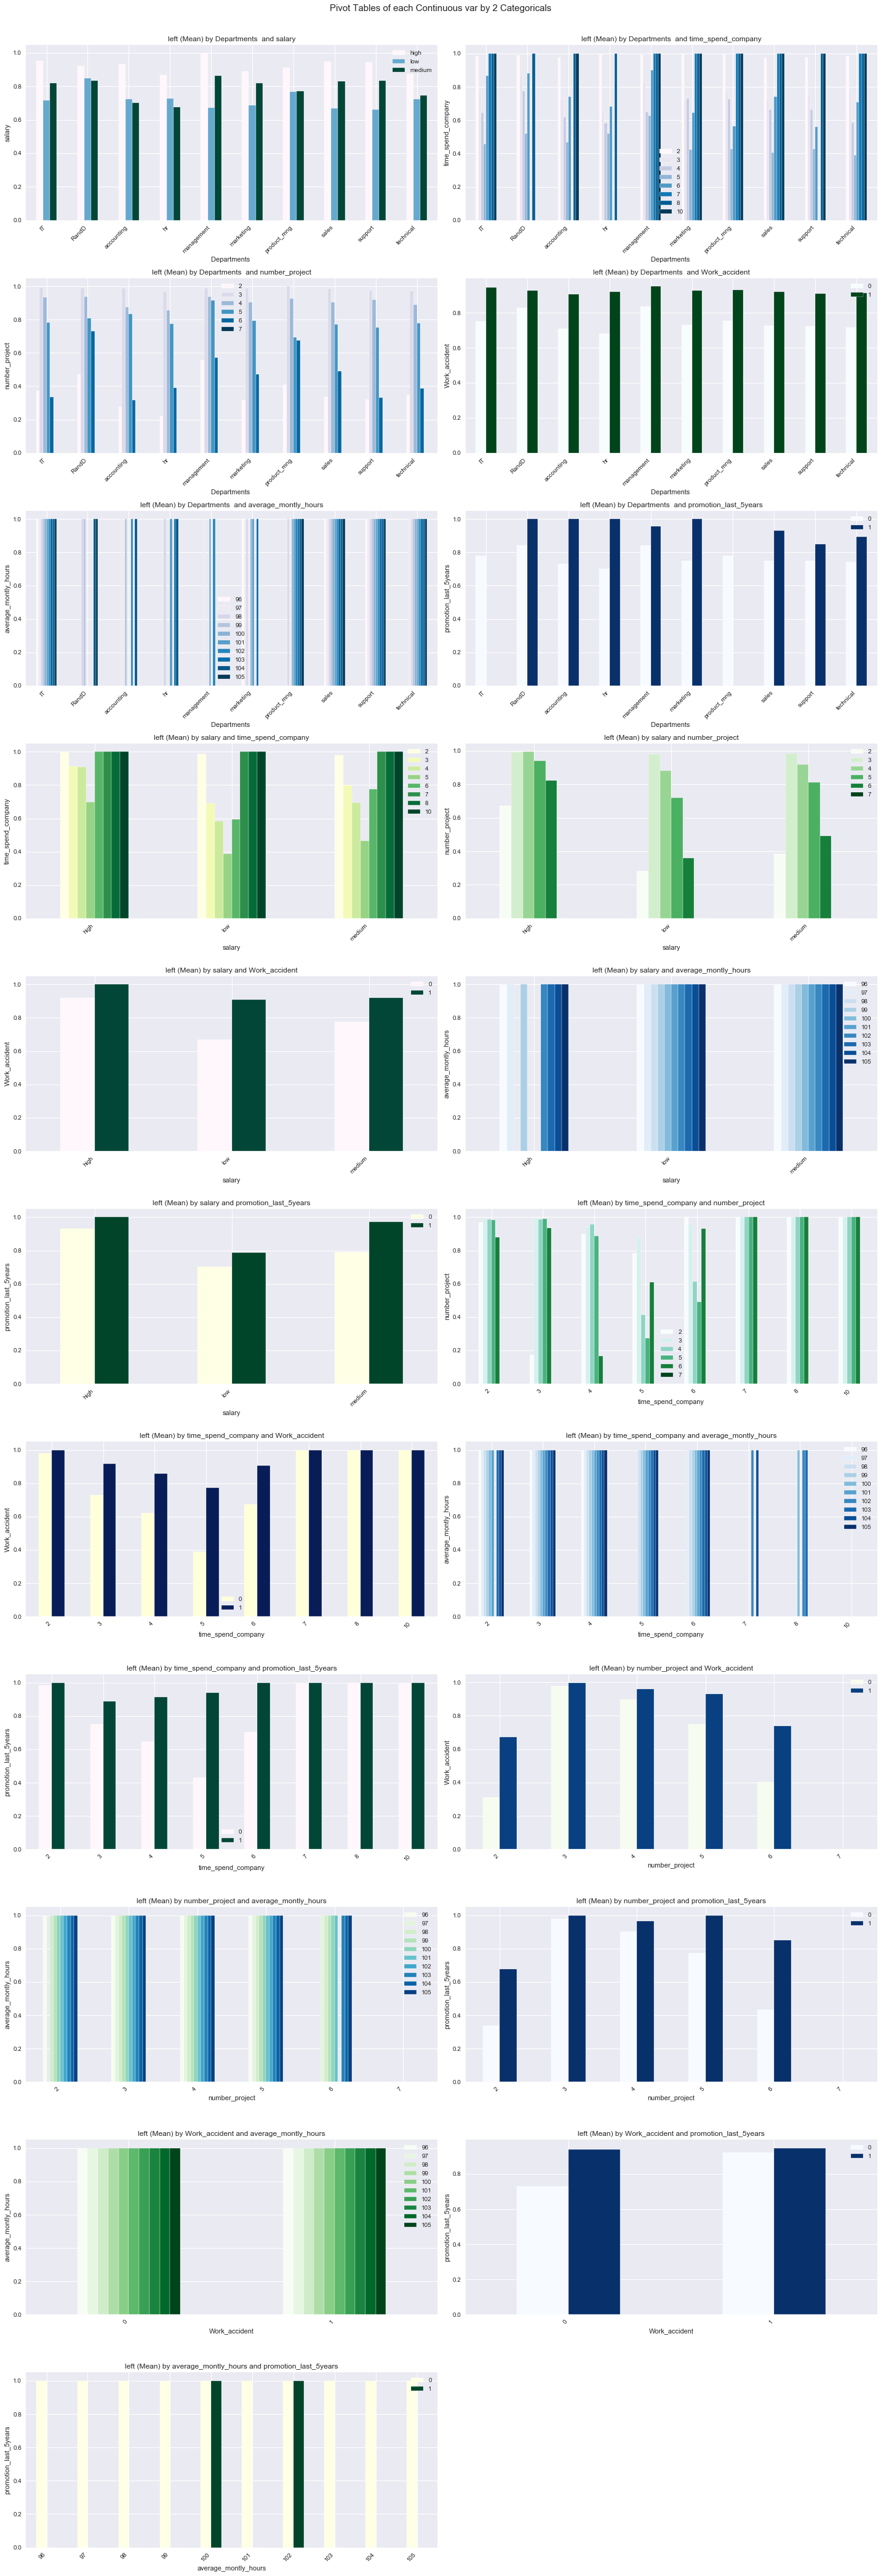

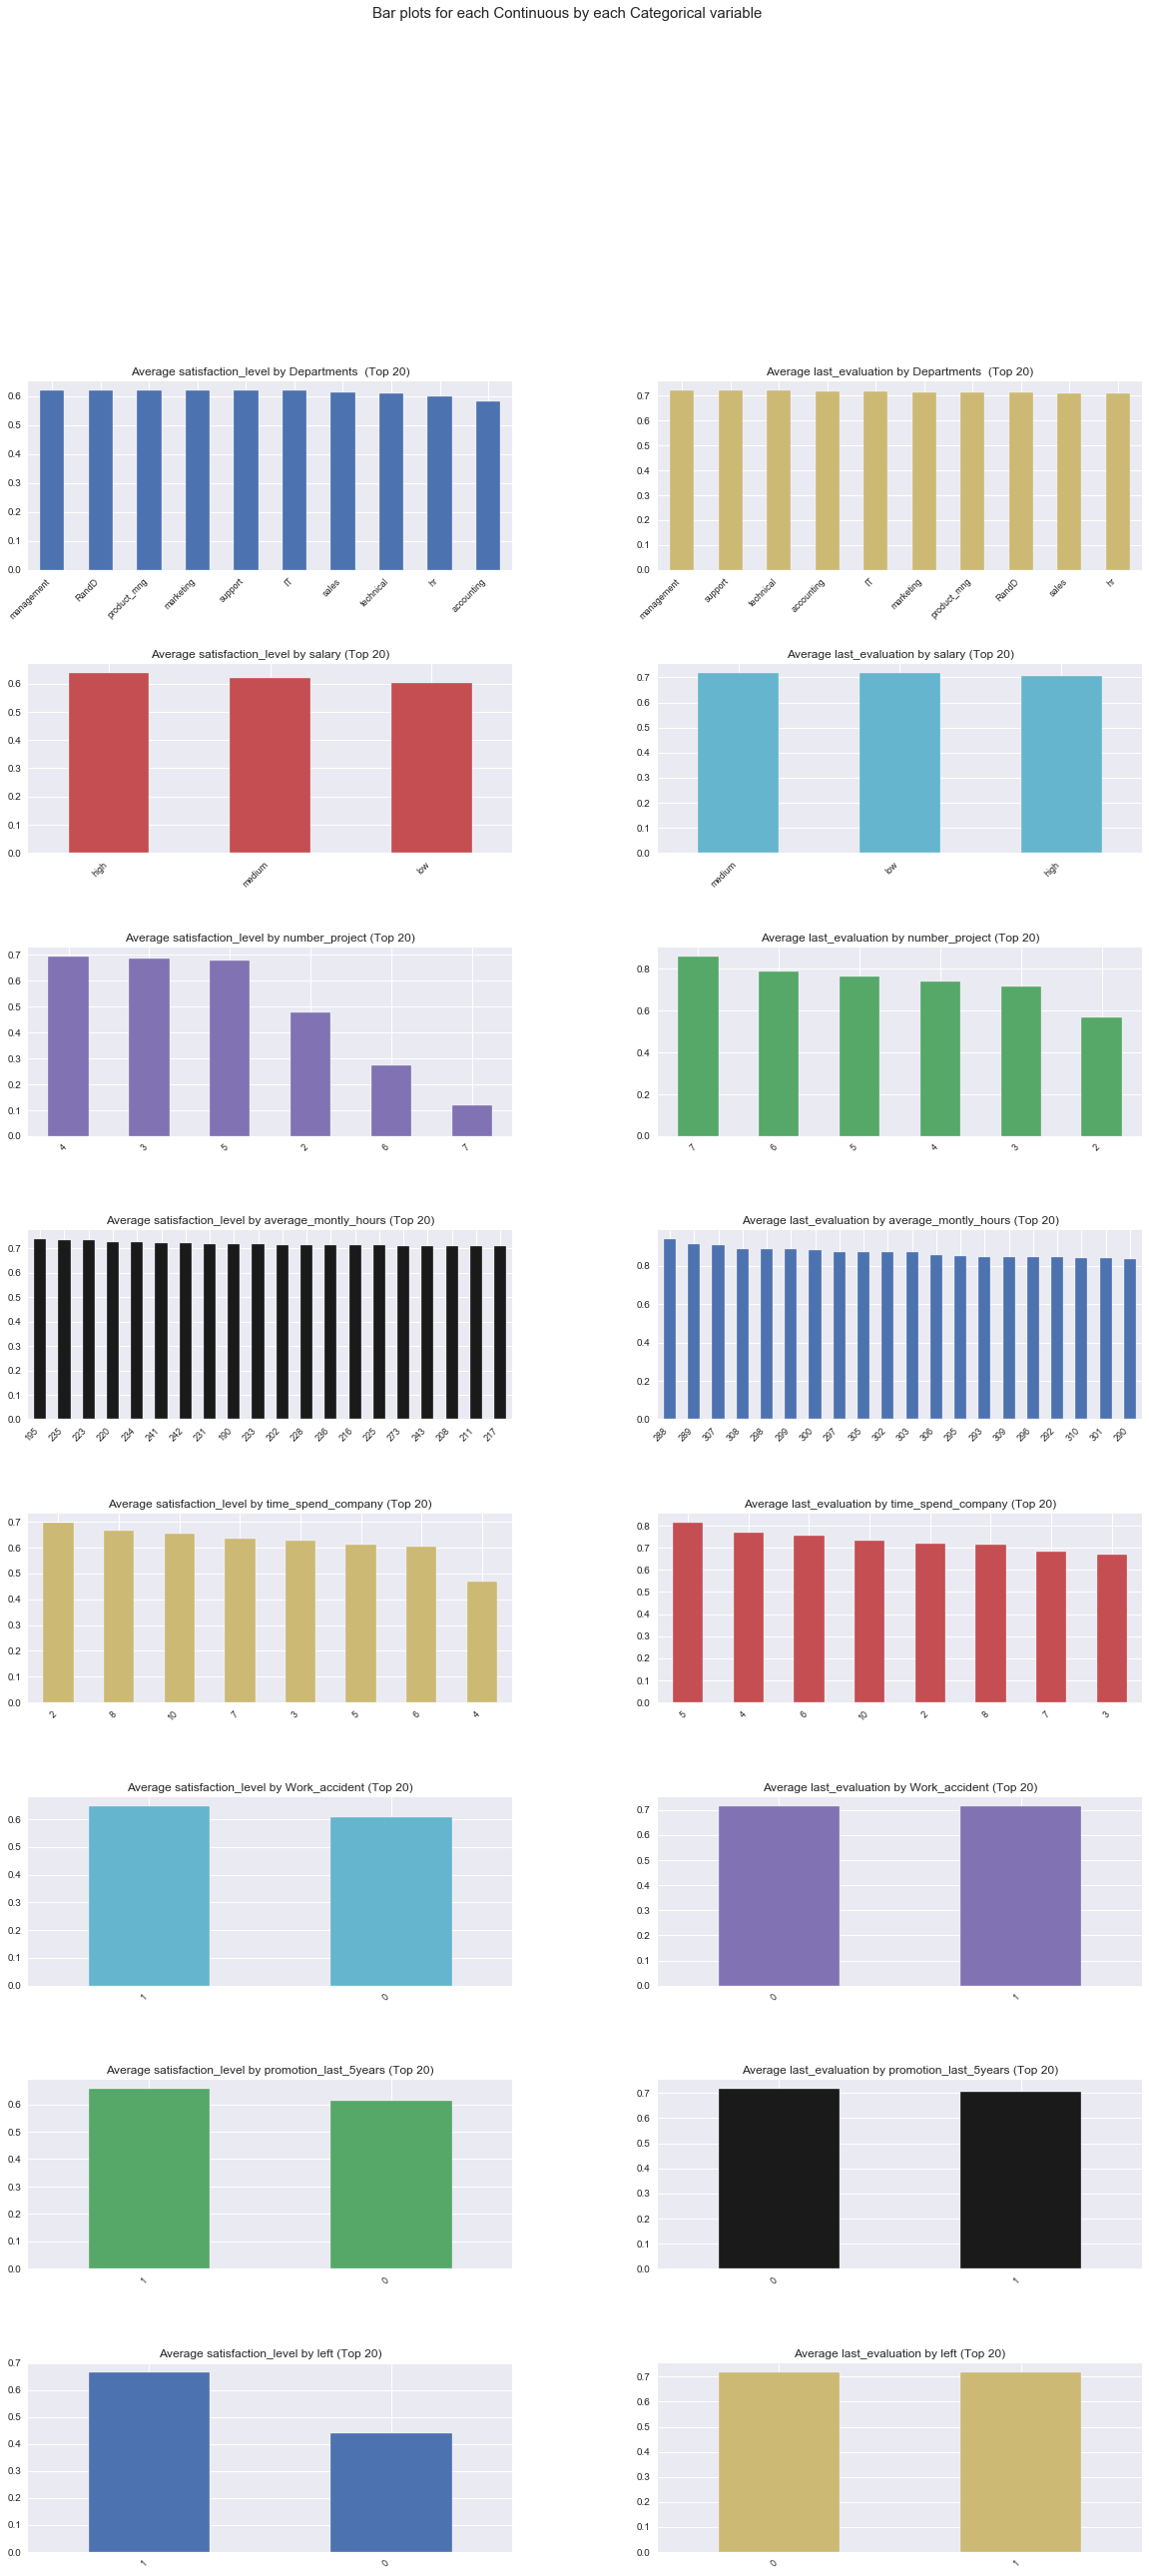

Time to run AutoViz (in seconds) = 17.423

 ###################### VISUALIZATION Completed ########################


In [23]:
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="left",
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=300000,
    max_cols_analyzed=30,
)

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [24]:
# There is a problem with the name of 'Departments ' column. First correcting it.
df.rename(columns={"Departments ": "Departments"}, inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X = df.drop(columns=['Departments', 'salary', 'left'])
X_cat = df[['Departments', 'salary']]

In [27]:
scaler = StandardScaler() # Standardization

In [28]:
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([-0.93649469, -1.08727529, -1.46286291, -0.88203988, -0.34123516,
       -0.41116529, -0.14741182])

In [29]:
df_scaled =pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412


#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [31]:
le = LabelEncoder()
X_cat["Departments"] = le.fit_transform(X_cat["Departments"])
X_cat

,Departments,salary
0,7,low
1,7,medium
2,7,medium
3,7,low
4,7,low
...,...,...
14994,8,low
14995,8,low
14996,8,low
14997,8,low


In [32]:
salary_dict = {'low':0, 'medium':1, 'high':2}

In [33]:
X_cat['salary'].replace(salary_dict, inplace=True)
X_cat.head()

,Departments,salary
0,7,0
1,7,1
2,7,1
3,7,0
4,7,0


In [34]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing Departments column (label encoded values of Departments)
enc_df = pd.DataFrame(enc.fit_transform(X_cat[['Departments']]).toarray())
# merge with main df dep_df on key values
X_cat_new = X_cat.join(enc_df)
X_cat_new

,Departments,salary,0,1,2,3,4,5,6,7,8,9
0,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(X_cat, columns=["Departments"], prefix=["DeptType"], drop_first=True)
dum_df.sample(20)

,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9
0,0,0,0,0,0,0,0,1,0,0
10400,1,0,0,0,0,0,0,1,0,0
9035,1,0,1,0,0,0,0,0,0,0
11173,1,0,0,0,0,0,0,0,0,0
13946,0,0,0,0,0,0,0,1,0,0
10985,1,0,0,0,0,0,0,0,0,0
9501,0,0,0,0,0,0,0,0,0,1
3706,0,0,0,0,0,0,0,0,0,1
13603,2,0,0,0,1,0,0,0,0,0
3205,0,1,0,0,0,0,0,0,0,0


In [36]:
# scaling the salary column
salary_df = dum_df[['salary']]
salary_scaled = scaler.fit_transform(salary_df)
salary_scaled[0]

array([-0.93336794])

In [37]:
salary_df =pd.DataFrame(salary_scaled, columns=salary_df.columns)
salary_df.head()

,salary
0,-0.933368
1,0.636092
2,0.636092
3,-0.933368
4,-0.933368


In [38]:
dum_df.drop('salary', inplace=True, axis=1)

In [39]:
# merge with main df other_dfs on key values
df_new = df_scaled.join([salary_df,dum_df])
df_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,0,1,0
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,0,1,0
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,0,1,0
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,0,1,0


## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [40]:
df_scaled = pd.concat([df_new, df[["left"]]], axis=1)
df_scaled.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9,left
13471,0.511484,-0.678309,0.159788,1.460704,4.452998,2.432112,-0.147412,0.636092,0,0,0,1,0,0,0,0,0,0
13272,1.155031,0.081199,-1.462863,0.039039,0.343655,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,0,1,0,0
3941,1.155031,-0.678309,0.159788,1.020188,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,0,1,0,0
14135,1.315917,0.607012,0.159788,-0.281336,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,0
7883,1.356139,0.665436,0.159788,1.020188,-1.026126,-0.411165,-0.147412,2.205553,0,0,0,0,0,0,1,0,0,0
7502,1.396361,-0.619886,0.159788,-0.041055,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,0
8756,-0.091840,1.191249,0.971113,0.499578,-0.341235,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,0,1,0,0
6961,0.149490,-1.087275,0.159788,-0.821970,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,0
568,-0.695165,-1.204123,-1.462863,-1.342579,-0.341235,-0.411165,-0.147412,0.636092,0,0,1,0,0,0,0,0,0,1
5300,1.315917,-0.152496,-1.462863,-0.061078,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,0,0,1,0


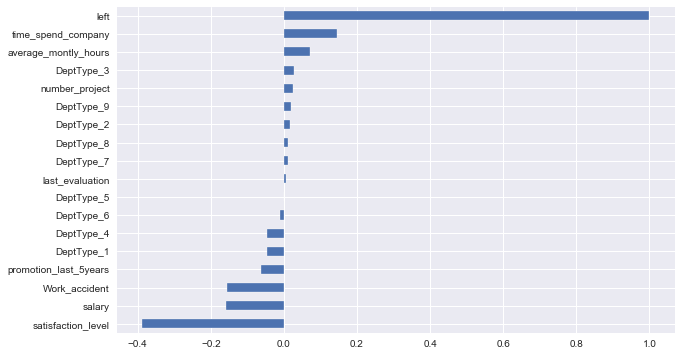

In [41]:
plt.figure(figsize=(10,6))
df_scaled.corr()["left"].sort_values().plot.barh()

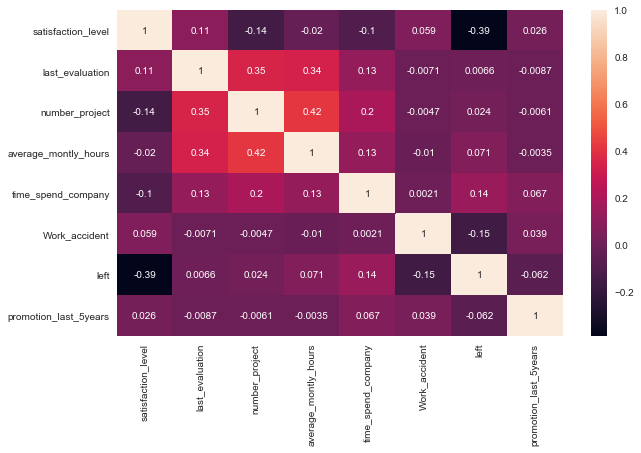

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

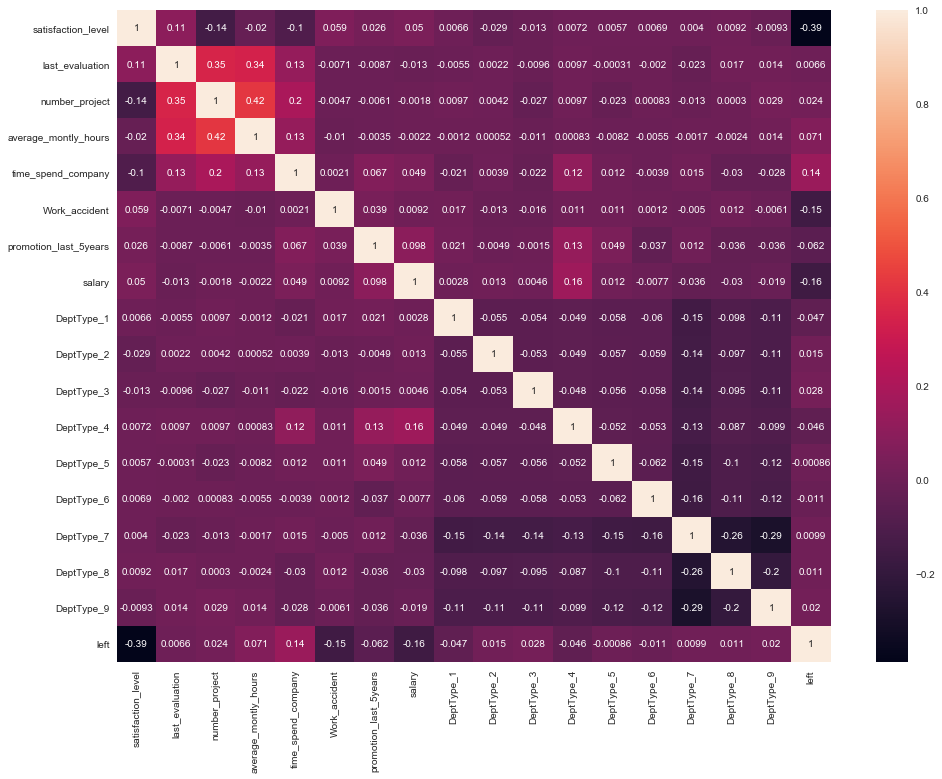

In [43]:
plt.figure(figsize=(16,12))
sns.heatmap(df_scaled.corr(),annot=True)
plt.show()

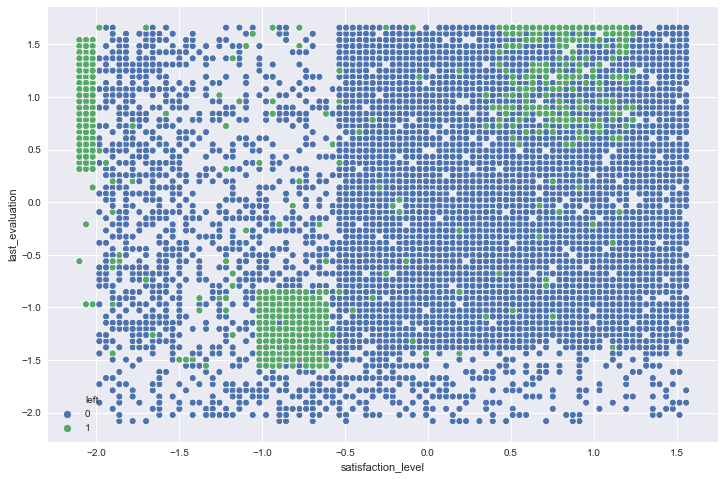

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot('satisfaction_level', 'last_evaluation', hue="left", data=df_scaled)
plt.show()

### K-Means

#### Hopkins

In [45]:
from pyclustertend import hopkins
hopkins(df_new, df_new.shape[0])

0.11308151195784097

In [46]:
left_df_new = df_scaled[df_scaled.left == 1].drop("left", axis=1)
left_df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0


In [47]:
left_df_new.shape

(3571, 17)

In [48]:
hopkins(left_df_new, left_df_new.shape[0])  

0.03188640894436318

***Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability and a score tending to 0 express a high cluster tendency.***

### Elbow

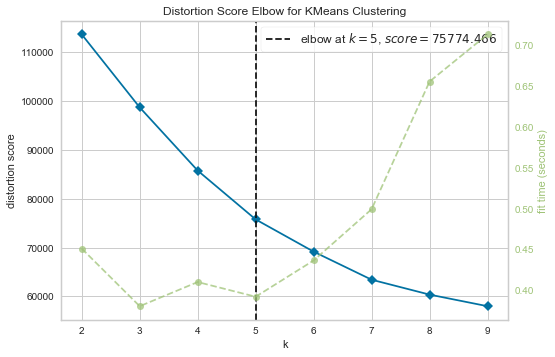

In [51]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_new)
visu.show()

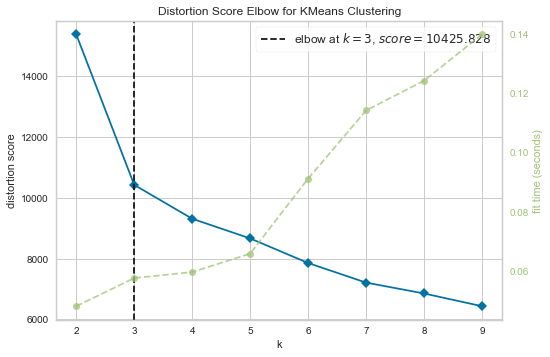

In [53]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(left_df_new)
visu.show()

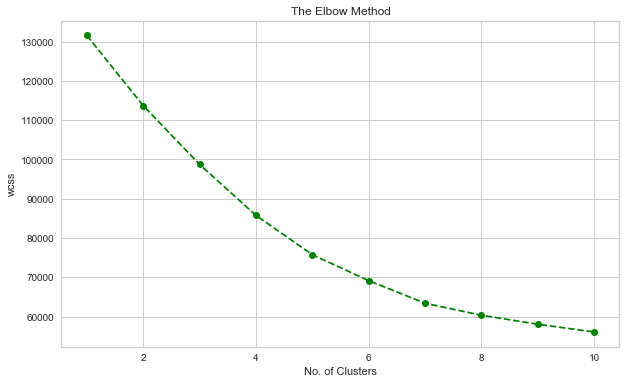

In [54]:
wcss =[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, color='green', marker='o', linestyle='dashed')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

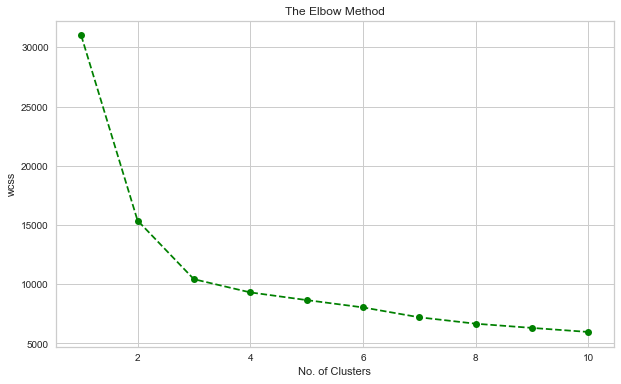

In [55]:
wcss =[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(left_df_new)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, color='green', marker='o', linestyle='dashed')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### Silhouette

In [56]:
from sklearn.metrics import silhouette_score

The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar).

In [57]:
kmeans = KMeans(n_clusters = 3)
y_means = kmeans.fit_predict(df_new)
silhouette_score(df_new, y_means)

0.175966751600251

In [58]:
kmeans = KMeans(n_clusters = 3)
y_means = kmeans.fit_predict(left_df_new)
silhouette_score(left_df_new, y_means)

0.4832018549770541

In [59]:
kmeans = KMeans(n_clusters = 5)
y_means = kmeans.fit_predict(df_new)
silhouette_score(df_new, y_means)

0.19531513910932502

In [60]:
kmeans = KMeans(n_clusters = 5)
y_means = kmeans.fit_predict(left_df_new)
silhouette_score(left_df_new, y_means)

0.38213885659705193

In [69]:
kmeansModel = KMeans(n_clusters=3).fit(df_new)

In [70]:
kmeansModel_left = KMeans(n_clusters=3).fit(left_df_new)

In [71]:
y_means = kmeansModel.predict(df_new)
df_new['cluster_Kmeans'] = y_means

In [75]:
y_means_left = kmeansModel_left.predict(left_df_new)
left_df_new['cluster_Kmeans'] = y_means_left

In [74]:
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9,cluster_Kmeans
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1


In [76]:
left_df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9,cluster_Kmeans
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,2
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1


In [77]:
kmeansModel.cluster_centers_

array([[-2.23282496e-01,  6.74635160e-01,  7.17954449e-01,
         7.11376076e-01,  5.60526255e-01, -4.10617982e-01,
         1.19426610e-01, -2.55280646e-02,  4.71607315e-02,
         5.48604427e-02,  4.61982676e-02,  4.94706449e-02,
         5.79403272e-02,  5.85178056e-02,  2.74302214e-01,
         1.43022137e-01,  1.86910491e-01, -1.33670852e-13],
       [ 1.11164291e-01, -4.53864715e-01, -4.84937578e-01,
        -4.76738008e-01, -3.82673008e-01, -4.11165293e-01,
        -1.08381110e-01,  1.08568563e-02,  5.34311158e-02,
         5.05500262e-02,  5.36930330e-02,  3.53588266e-02,
         5.48716606e-02,  6.10267156e-02,  2.78810896e-01,
         1.49423782e-01,  1.79151388e-01,  2.00000000e+00],
       [ 1.43497250e-01, -1.79975528e-02, -1.23570184e-02,
        -2.54738409e-02,  4.68505136e-03,  2.43211190e+00,
         9.55613092e-02,  2.29314304e-02,  6.18081181e-02,
         4.42804428e-02,  4.10516605e-02,  4.75092251e-02,
         6.36531365e-02,  6.08856089e-02,  2.70295203e

In [80]:
labels = kmeansModel.labels_

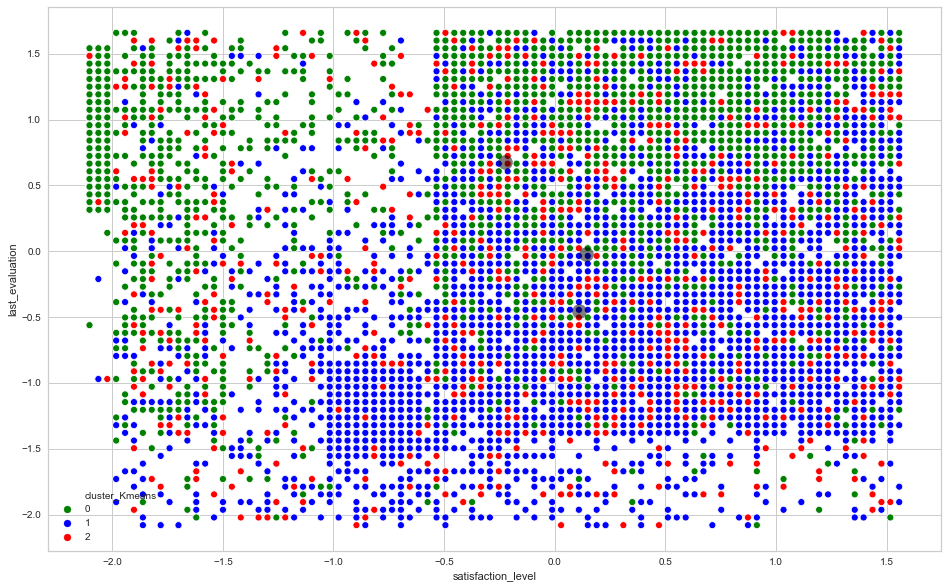

In [81]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='satisfaction_level', y="last_evaluation", hue='cluster_Kmeans', data=df_new, palette=['green','blue','red'], legend='full')
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

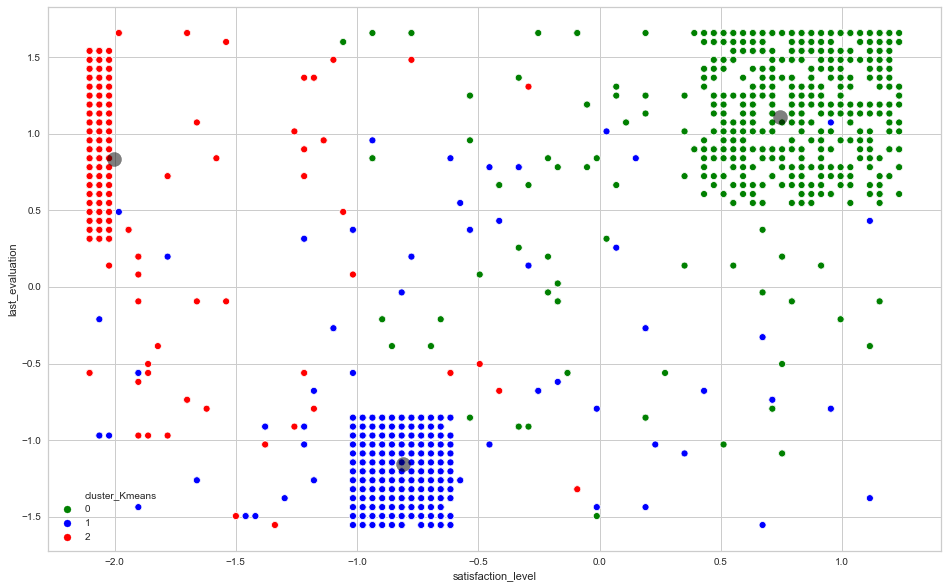

In [82]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='satisfaction_level', y="last_evaluation", hue='cluster_Kmeans', data=left_df_new, palette=['green','blue','red'], legend='full')
plt.scatter(kmeansModel_left.cluster_centers_[:, 0], kmeansModel_left.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

**Left Employees**

In [83]:
df_scaled['cluster_Kmeans'] = y_means

In [86]:
left_df_scaled = df_scaled[df_scaled.left == 1]
left_df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9,left,cluster_Kmeans
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,1,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,1,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1,1


Text(0.5, 1.0, '3 clusters of employees who left')

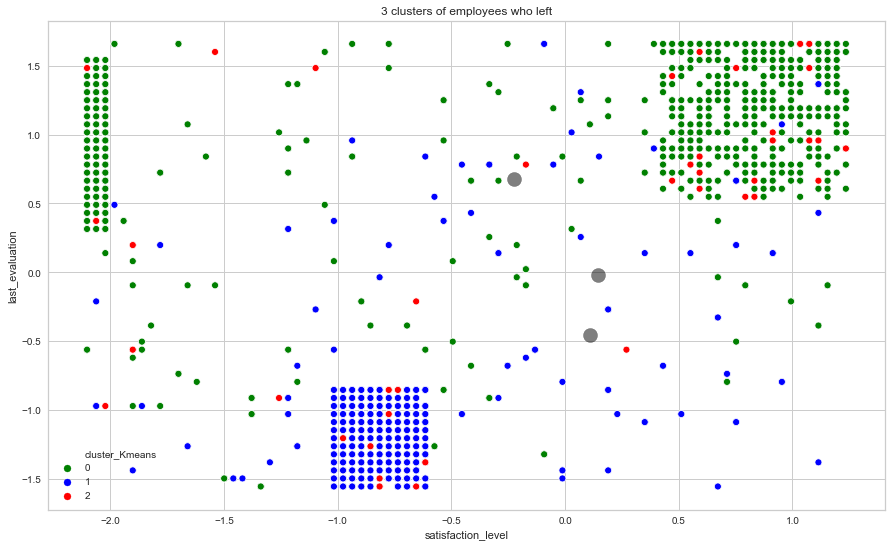

In [87]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='satisfaction_level', y="last_evaluation", hue='cluster_Kmeans', data=left_df_scaled, palette=['green','blue','red'], legend='full')
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')
plt.title("3 clusters of employees who left")

## 5. Model Building

In [88]:
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9,cluster_Kmeans
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1


In [89]:
df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9,left,cluster_Kmeans
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,1,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,0,0,0,0,0,0,1,0,0,1,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,0,0,0,0,0,0,1,0,0,1,1


In [90]:
X = df_scaled.drop(["left", "cluster_Kmeans"], axis=1)

In [91]:
y = df_scaled['left']

In [92]:
y.shape

(14999,)

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)

In [101]:
y_train.shape

(10499,)

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, stratify=y_train, random_state = 0)

In [103]:
X_train.shape

(8399, 17)

In [104]:
y_train.shape

(8399,)

In [105]:
X_test.shape

(4500, 17)

In [106]:
y_test.shape

(4500,)

In [107]:
X_val.shape

(2100, 17)

In [108]:
y_val.shape

(2100,)

### #Gradient Boosting Classifier

#### Model Building

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3393   36]
 [  75  996]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3429
           1       0.97      0.93      0.95      1071

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Text(0.5, 29.5, 'Actual Label')

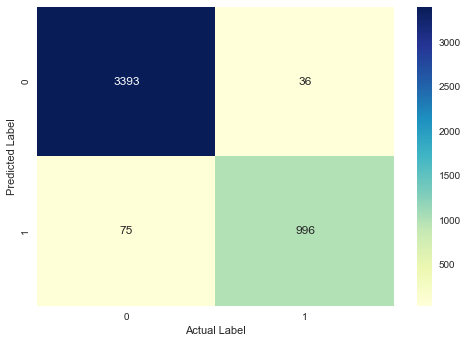

In [113]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu", fmt='g')

plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

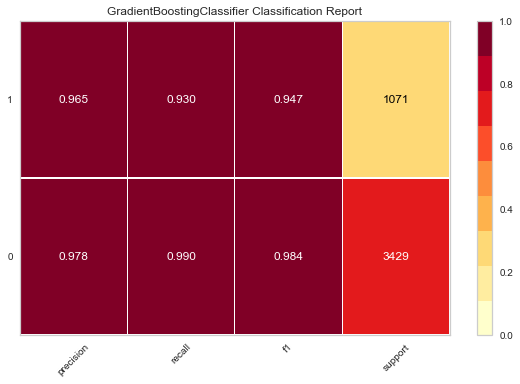

In [114]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(gb_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

#### Prediction

In [115]:
# saving model
import pickle
pickle.dump(gb_model, open("gb_model", 'wb'))  # our model is saved.

In [163]:
# recall model
saved_model_gb = pickle.load(open("gb_model", "rb"))  # our model is called

In [164]:
# prediction
prediction = saved_model_gb.predict(X_val)  # X_val is a scaled validation data

In [118]:
df_pred = y_val.to_frame()
df_pred.head()

,left
8206,0
11665,0
7155,0
7977,0
1399,1


In [119]:
df_pred["pred"] = prediction
df_pred.sample(15)

,left,pred
14515,1,1
218,1,1
3457,0,0
9556,0,0
9766,0,0
7897,0,0
12600,1,1
12872,0,0
11344,0,0
10383,0,0


### #KNeighbors Classifier

#### Model Building

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

#### Evaluating Model Performance

In [123]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3299  130]
 [ 100  971]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3429
           1       0.88      0.91      0.89      1071

    accuracy                           0.95      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500



Text(0.5, 29.5, 'Actual Label')

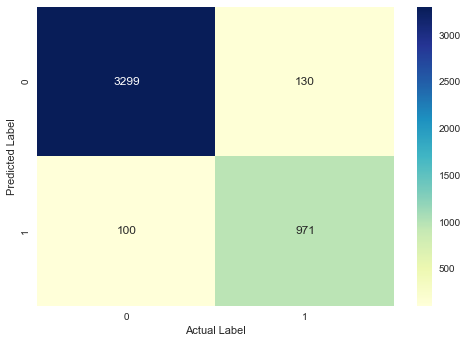

In [124]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu", fmt='g')

plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')

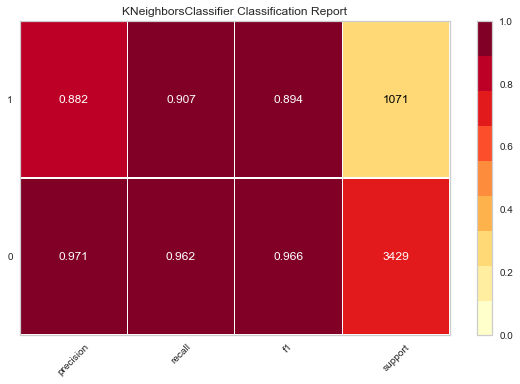

In [125]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(knn_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

#### Model Tuning (GridsearchCV)

In [126]:
knn = KNeighborsClassifier()

In [129]:
n_neighbours = np.arange(1, 50)

In [130]:
knn_params = {'n_neighbors':n_neighbours}

In [132]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [133]:
knn_cv_model.best_params_

{'n_neighbors': 2}

In [134]:
knn_tuned_model = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)

In [135]:
y_pred = knn_tuned_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3360   69]
 [ 102  969]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3429
           1       0.93      0.90      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500



Text(0.5, 29.5, 'Actual Label')

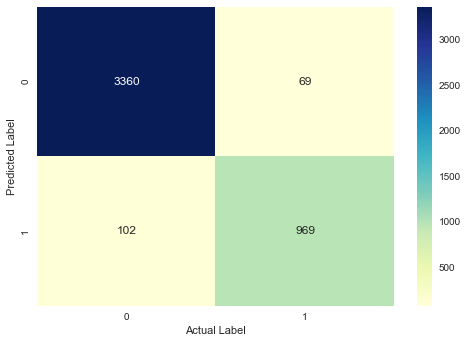

In [136]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu", fmt='g')

plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')

### Prediction

In [137]:
# saving model
import pickle
pickle.dump(knn_tuned_model, open("knn_model", 'wb'))  # our model is saved.

In [165]:
# recall model
saved_model_knn = pickle.load(open("knn_model", "rb"))  # our model is called

In [166]:
# prediction
prediction = saved_model_knn.predict(X_val)  # X_val is a scaled validation data

In [140]:
df_pred = y_val.to_frame()
df_pred.head()

,left
8206,0
11665,0
7155,0
7977,0
1399,1


In [141]:
df_pred["pred"] = prediction

In [142]:
df_pred.sample(15)

,left,pred
4175,0,0
11927,0,0
1714,1,1
7495,0,0
4077,0,0
12386,1,1
11143,0,0
6586,0,0
1491,1,1
10862,0,0


### #Random Forest Classifier

#### Model Building

In [143]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#### Evaluating Model Performance

In [144]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3422    7]
 [  37 1034]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



Text(0.5, 29.5, 'Actual Label')

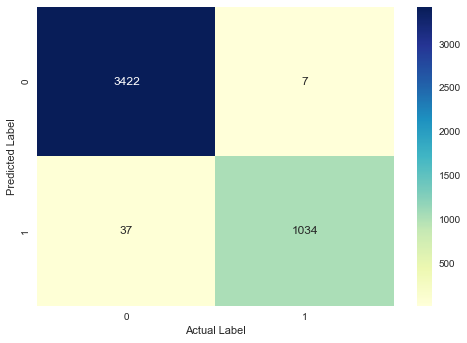

In [145]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')

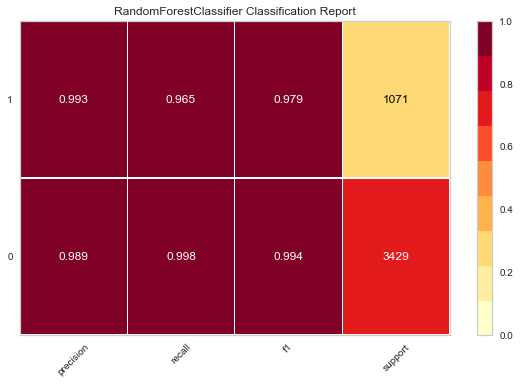

In [146]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

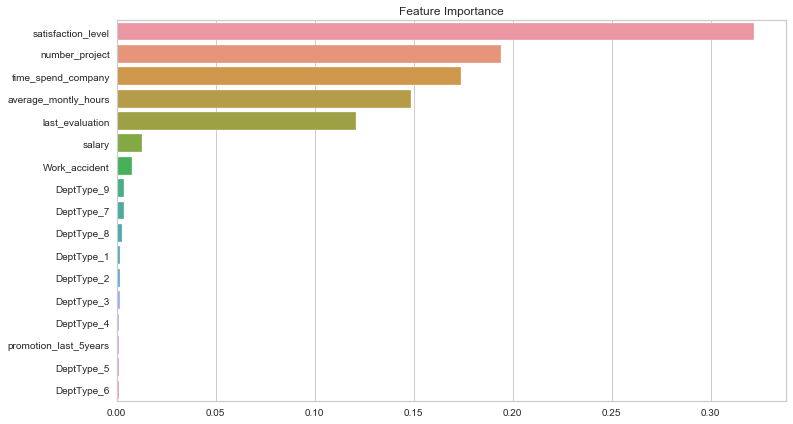

In [148]:
plt.figure(figsize=(12,7))
feature_imp = pd.Series(rf_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

#### Prediction

In [149]:
# saving model
import pickle
pickle.dump(rf_model, open("rf_model", 'wb'))  # our model is saved.

In [167]:
# recall model
saved_model_rf = pickle.load(open("rf_model", "rb"))  # our model is called

In [168]:
# prediction
prediction = saved_model_rf.predict(X_val)  # X_val is a scaled validation data

In [152]:
df_pred = y_val.to_frame()
df_pred.head()

,left
8206,0
11665,0
7155,0
7977,0
1399,1


In [153]:
df_pred["pred"] = prediction
df_pred.sample(15)

,left,pred
5445,0,0
6323,0,0
3694,0,0
2245,0,0
4985,0,0
11623,0,0
12032,1,1
5650,0,0
6265,0,0
4884,0,0


#### Another Prediction

In [169]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [202]:
df.iloc[11696].to_dict()

{'satisfaction_level': 0.73,
 'last_evaluation': 0.94,
 'number_project': 3,
 'average_montly_hours': 177,
 'time_spend_company': 3,
 'Work_accident': 0,
 'left': 0,
 'promotion_last_5years': 0,
 'Departments': 'technical',
 'salary': 'low'}

In [183]:
df_new.iloc[11696].to_dict()

{'satisfaction_level': 0.47126282809487835,
 'last_evaluation': 1.3080965555925155,
 'number_project': -0.6515376353033031,
 'average_montly_hours': -0.4815708028399059,
 'time_spend_company': -0.3412351634317259,
 'Work_accident': -0.411165292668967,
 'promotion_last_5years': -0.14741182188551782,
 'salary': -0.93336794271217,
 'DeptType_1': 0.0,
 'DeptType_2': 0.0,
 'DeptType_3': 0.0,
 'DeptType_4': 0.0,
 'DeptType_5': 0.0,
 'DeptType_6': 0.0,
 'DeptType_7': 0.0,
 'DeptType_8': 0.0,
 'DeptType_9': 1.0,
 'cluster_Kmeans': 1.0}

In [237]:
df.iloc[1431].to_dict()

{'satisfaction_level': 0.36,
 'last_evaluation': 0.5,
 'number_project': 2,
 'average_montly_hours': 147,
 'time_spend_company': 3,
 'Work_accident': 0,
 'left': 1,
 'promotion_last_5years': 0,
 'Departments': 'technical',
 'salary': 'medium'}

In [242]:
df_new.iloc[1431].to_dict()

{'satisfaction_level': -1.016937975760963,
 'last_evaluation': -1.2625463996449282,
 'number_project': -1.4628629148312604,
 'average_montly_hours': -1.0822744134358138,
 'time_spend_company': -0.3412351634317259,
 'Work_accident': -0.411165292668967,
 'promotion_last_5years': -0.14741182188551782,
 'salary': 0.6360923457115786,
 'DeptType_1': 0.0,
 'DeptType_2': 0.0,
 'DeptType_3': 0.0,
 'DeptType_4': 0.0,
 'DeptType_5': 0.0,
 'DeptType_6': 0.0,
 'DeptType_7': 0.0,
 'DeptType_8': 0.0,
 'DeptType_9': 1.0,
 'cluster_Kmeans': 1.0}

In [213]:
my_dict = {'satisfaction_level': 0.73,
 'last_evaluation': 0.94,
 'number_project': 3,
 'average_montly_hours': 177,
 'time_spend_company': 3,
 'Work_accident': 0,
 'promotion_last_5years': 0,
 'salary': 0,
 'DeptType_1': 0.0,
 'DeptType_2': 0.0,
 'DeptType_3': 0.0,
 'DeptType_4': 0.0,
 'DeptType_5': 0.0,
 'DeptType_6': 0.0,
 'DeptType_7': 0.0,
 'DeptType_8': 0.0,
 'DeptType_9': 1.0}

In [193]:
df.iloc[218].to_dict()

{'satisfaction_level': 0.43,
 'last_evaluation': 0.53,
 'number_project': 2,
 'average_montly_hours': 131,
 'time_spend_company': 3,
 'Work_accident': 0,
 'left': 1,
 'promotion_last_5years': 0,
 'Departments': 'IT',
 'salary': 'low'}

In [197]:
df_new.iloc[218].to_dict()

{'satisfaction_level': -0.7353864723287767,
 'last_evaluation': -1.0872752890605568,
 'number_project': -1.4628629148312604,
 'average_montly_hours': -1.402649672420298,
 'time_spend_company': -0.3412351634317259,
 'Work_accident': -0.411165292668967,
 'promotion_last_5years': -0.14741182188551782,
 'salary': -0.93336794271217,
 'DeptType_1': 0.0,
 'DeptType_2': 0.0,
 'DeptType_3': 0.0,
 'DeptType_4': 0.0,
 'DeptType_5': 0.0,
 'DeptType_6': 0.0,
 'DeptType_7': 0.0,
 'DeptType_8': 0.0,
 'DeptType_9': 0.0,
 'cluster_Kmeans': 1.0}

In [243]:
my_dict2 = {'satisfaction_level': 0.36,
 'last_evaluation': 0.5,
 'number_project': 2,
 'average_montly_hours': 147,
 'time_spend_company': 3,
 'Work_accident': 0,
 'promotion_last_5years': 0,
 'salary': 1,
 'DeptType_1': 0.0,
 'DeptType_2': 0.0,
 'DeptType_3': 0.0,
 'DeptType_4': 0.0,
 'DeptType_5': 0.0,
 'DeptType_6': 0.0,
 'DeptType_7': 0.0,
 'DeptType_8': 0.0,
 'DeptType_9': 1.0,}

In [234]:
df.sample(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
1431,0.36,0.50,2,147,3,0,1,0,technical,medium
6202,0.68,0.49,4,153,4,0,0,0,sales,low


In [215]:
df_sample = pd.DataFrame([my_dict])
df_sample

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9
0,0.73,0.94,3,177,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [244]:
df_sample2 = pd.DataFrame([my_dict2])
df_sample2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9
0,0.36,0.5,2,147,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [245]:
single_pred = saved_model_rf.predict(df_sample)
single_pred

array([0])

In [246]:
single_pred_prob = saved_model_rf.predict_proba(df_sample)
single_pred_prob

array([[0.6, 0.4]])

In [247]:
single_pred2 = saved_model_rf.predict(df_sample2)
single_pred2

array([0])

In [248]:
single_pred_prob2 = saved_model_rf.predict_proba(df_sample2)
single_pred_prob2

array([[0.54, 0.46]])

## 6. Model Deployment

We cooked the food in the kitchen and moved on to the serving stage. The question is how do we showcase our work to others? Model Deployement helps us showcase our work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making our models available to our other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model we built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipeline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, will jump to new .py file and create our web app with Streamlit.

### Save and Export the Model as .pkl

*The Models were already saved and exported in prediction section.*

In [222]:
my_dict = {'satisfaction_level': 0.21,
 'last_evaluation': 0.33,
 'number_project': 2,
 'average_montly_hours': 110,
 'time_spend_company': 2}

dfp = pd.DataFrame.from_dict([my_dict])

In [223]:
dfp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.21,0.33,2,110,2


### Save and Export Variables as .pkl

In [224]:
columns = X.columns
columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'DeptType_1', 'DeptType_2',
       'DeptType_3', 'DeptType_4', 'DeptType_5', 'DeptType_6', 'DeptType_7',
       'DeptType_8', 'DeptType_9'],
      dtype='object')

In [225]:
dfp = pd.get_dummies(dfp).reindex(columns=columns, fill_value=0)
dfp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,DeptType_1,DeptType_2,DeptType_3,DeptType_4,DeptType_5,DeptType_6,DeptType_7,DeptType_8,DeptType_9
0,0.21,0.33,2,110,2,0,0,0,0,0,0,0,0,0,0,0,0


In [233]:
model_list = [saved_model_gb, saved_model_knn, saved_model_rf]

for model in model_list:
    prediction = model.predict(dfp)
    print(model, 'Result :', prediction)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) Result : [0]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform') Result : [1]
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                 